## Hello, human.  It's our last week of python!  (For real [Kind of...])

### I) Self-inventory

Next week, we will begin using the MATLAB programming language.  Much of what we do with MATLAB will be learning the MATLAB syntax for operations that we already know how to do in python.  So, this week we'll have a short session in which you learn one more technique in python.  As you do, please try to think less about the syntax and more about the underlying algorithms and processes that you are encoding!  You'll implement many of these same structures with MATLAB (and with other programming languages, should you learn some).  The syntax is important, but not nearly important as the goals and algorithms for achieving them.

You know how to do a LOT of stuff.

* * *

### II) Fitting/model optimization

If there is one mantra that you should be repeating in this course, it's "I DON'T NEED EXCEL ANYMORE, I DON'T NEED EXCEL ANYMORE, I DON'T NE..."

This is, of course, somewhat of a joke.  There are some analyses to which Excel is especially suited (*e.g.*, doing your personal finances).
But we've seen that much more flexibility, analysis power, speed, and modularity are achievable with procedural programming.  We've quickly built an arsenal of skills with python that can replace most of the Excel manipulations.  You're *nearly* free of the Evil Empire!

The last skill that we'll investigate is fitting functions to data.  This is an indispensible skill/technique in the physical sciences,and it's something that you've done many times using Excel or Logger Pro.  Often in physics, we have data from which we want to extract physical parameters (like when fitting time-series data with kinematic functions) or parameters that characterize the entire data collection.  (We'll explore the latter of these first.)

Python (and other languages) have modules or libraries that do fitting, as well.  These modules are *much* more powerful and general than what you'll find in Excel, but this power comes at the cost of having to learn a few new syntaxes. (syntaces?  syntaci?  Not sure.)

So, let's look at some "data".  Place into the same directory that this notebook occupies the file heights.txt.  This is a very simple data file that contains the heights (in cm) of a population.  Let's read them in and make a histogram.

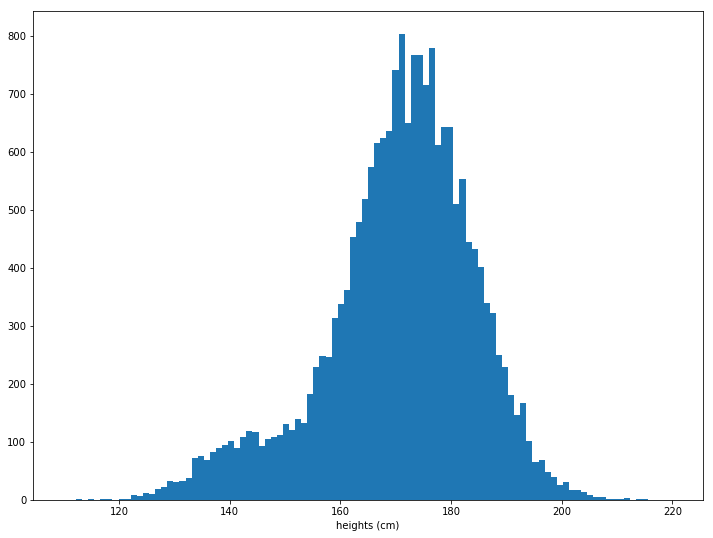

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fil = open('heights.txt','r')

lin = fil.readline()
harr = []

while len(lin) > 1:
    harr.append(float(lin))
    lin = fil.readline()

harr = np.array(harr)

plt.clf()
fig, ax = plt.subplots()
fig.set_size_inches(12,9)
ns = ax.hist(harr,bins=100,range=[110,220])
plt.xlabel('heights (cm)')

plt.show()

Cool!  So, as we would expect, the data looks kind of gaussian-ish, possibly with some "funky stuff" happening on the low-end tail.  

Notice that I set histarr equal to the output of the histogramming step above.  We'll use this below.  This output is two-dimensional array.  The first array is an array of the numbers in each bin, and the second array is an array of the corresponding bin borders:

In [2]:
print(ns[0])
print(ns[1])
print(len(ns[0]))
print(len(ns[1]))

[   0.    0.    1.    0.    1.    0.    1.    1.    0.    2.    2.    9.
    7.   12.   10.   19.   22.   33.   30.   32.   38.   72.   76.   69.
   83.   90.   95.  102.   90.  109.  119.  117.   92.  105.  108.  112.
  130.  120.  140.  133.  183.  229.  248.  247.  313.  337.  362.  453.
  479.  519.  574.  616.  624.  637.  742.  804.  651.  767.  767.  715.
  779.  612.  643.  643.  510.  554.  445.  433.  401.  340.  323.  250.
  230.  180.  146.  167.  102.   65.   69.   48.   39.   25.   31.   17.
   17.   14.    9.    4.    5.    1.    2.    2.    3.    0.    1.    2.
    0.    0.    0.    0.]
[ 110.   111.1  112.2  113.3  114.4  115.5  116.6  117.7  118.8  119.9
  121.   122.1  123.2  124.3  125.4  126.5  127.6  128.7  129.8  130.9
  132.   133.1  134.2  135.3  136.4  137.5  138.6  139.7  140.8  141.9
  143.   144.1  145.2  146.3  147.4  148.5  149.6  150.7  151.8  152.9
  154.   155.1  156.2  157.3  158.4  159.5  160.6  161.7  162.8  163.9
  165.   166.1  167.2  168.3  169.4

OH SNAP!  The bin borders array has one more element than the bin occupancies array.  We can use the bin borders array to create a bin centers array by doing the following:


In [3]:
bin_occs = ns[0]
bin_centers = []
for i in range(len(bin_occs)):
    bin_centers.append(0.5*(ns[1][i] + ns[1][i+1]))
    
print(bin_centers)
print(len(bin_centers))

[110.55, 111.65000000000001, 112.75, 113.84999999999999, 114.95, 116.05, 117.15000000000001, 118.25, 119.34999999999999, 120.45, 121.55, 122.65000000000001, 123.75, 124.84999999999999, 125.95, 127.05, 128.14999999999998, 129.25, 130.35000000000002, 131.44999999999999, 132.55000000000001, 133.64999999999998, 134.75, 135.85000000000002, 136.94999999999999, 138.05000000000001, 139.14999999999998, 140.25, 141.35000000000002, 142.44999999999999, 143.55000000000001, 144.64999999999998, 145.75, 146.85000000000002, 147.94999999999999, 149.05000000000001, 150.14999999999998, 151.25, 152.35000000000002, 153.44999999999999, 154.55000000000001, 155.64999999999998, 156.75, 157.85000000000002, 158.94999999999999, 160.05000000000001, 161.14999999999998, 162.25, 163.35000000000002, 164.44999999999999, 165.55000000000001, 166.64999999999998, 167.75, 168.85000000000002, 169.94999999999999, 171.05000000000001, 172.15000000000001, 173.25, 174.35000000000002, 175.44999999999999, 176.55000000000001, 177.650

Make sure you understand what's going on in the loop in the previous cell!  It's dense, but you have the knowledge to know how to read it.

To *characterize* the data, we'll fit a single gaussian function (a "bell curve") to the data.  In python, this is done easily with the scipy (scientific python) optimize module.

Before we do so, it is CRUCIALLY IMPORTANT to understand what we're doing.  We're trying to find the parameters $a$, $\mu$, and $\sigma$ in a gaussian function 
$$g(h) = a \exp \left[ - \frac{(h-\mu)^2}{2\sigma^2} \right]$$
that will describe the number of data in each of our bins as a function of the bin center ($h$).
WE supply the functional form, but python finds the best values for the fit parameters $a$, $\mu$, and $\sigma$.

Let's DO IT!

In [4]:
from scipy.optimize import curve_fit

## first we define a function that represents our fit funnction.
## this will be a gaussian function of h with scale, mean, and width parameters
def single_gauss(h, a, m, s):
    return a*np.exp(-(h-m)**2/2.0/s**2)

popt, pcov = curve_fit(single_gauss, bin_centers, bin_occs, p0 = [500, 170, 20])

print(popt)

[ 729.07301409  172.98902478   11.09514751]


The curve_fit function optimize the values of the parameters in the function and returns these optimal values as an array, which we are calling popt.  I printed out the optimal values on at the end of the previous block.

The last argument that I supplied to curve_fit is an array of starting values for the fit parameters.  I guessed at these values just by looking at the histogram.  These don't *need* to be supplied, but it makes python's optimization job a lot easier to have some good starting values.

Let's now plot the optimized fit function and *visually* inspect how good the fit is.

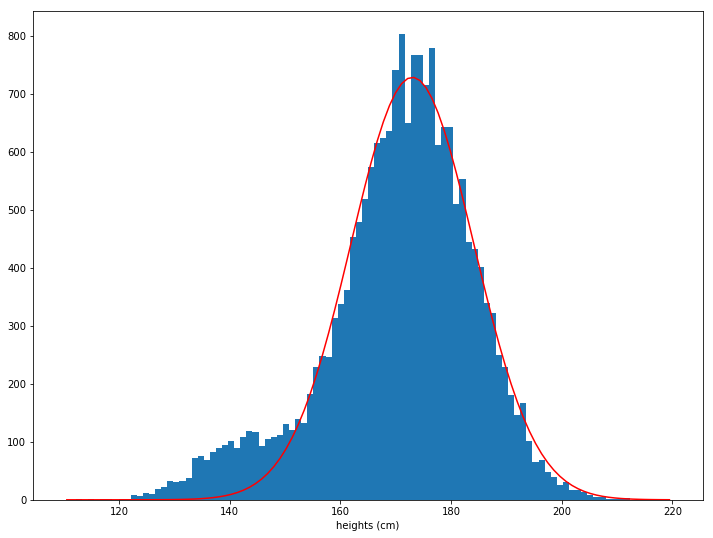

In [5]:
fcn_vals = single_gauss(bin_centers, popt[0], popt[1], popt[2])

plt.clf()
fig, ax = plt.subplots()
fig.set_size_inches(12,9)
ax.hist(harr,bins=100,range=[110,220])
plt.xlabel('heights (cm)')

ax.plot(bin_centers,fcn_vals,"r-")
plt.show()

Wow!  That looks pretty... well, it look okay.  That funky lower tail is bugging me.  Let's construct a more general function as a sum of two gaussians to try to fit both contributions.  We can use the same procedure as before:

[ 742.86846295  173.27616681   10.55270211   95.79279496  141.50266129
    7.74503044]


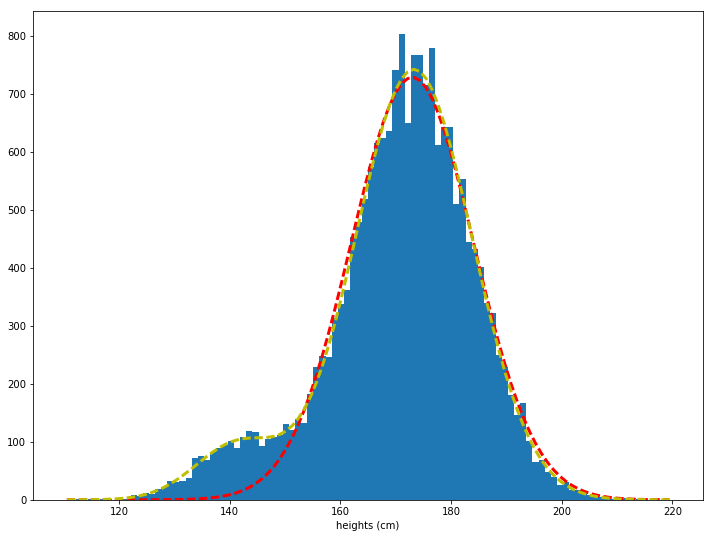

In [6]:
def double_gauss(h, a1, m1, s1, a2, m2, s2):
    return a1*np.exp(-(h-m1)**2/2.0/s1**2) + a2*np.exp(-(h-m2)**2/2.0/s2**2)

popt2, pcov2 = curve_fit(double_gauss, bin_centers, bin_occs, 
                         p0 = [500, 170, 20, 100, 150, 10])

print(popt2)

fcn2_vals = double_gauss(bin_centers, popt2[0], popt2[1], popt2[2], 
                             popt2[3], popt2[4], popt2[5])

## let's plot them all together now!

plt.clf()
fig, ax = plt.subplots()
fig.set_size_inches(12,9)
ax.hist(harr,bins=100,range=[110,220])
plt.xlabel('heights (cm)')

ax.plot(bin_centers,fcn_vals,"r--",linewidth=3)
ax.plot(bin_centers,fcn2_vals,"y--",linewidth=3)
plt.show()

NOW THAT'S A FIT.  WOO WOO.

What can we learn from this?  Well, if this were REAL data, we would probably hypothesize that our population consists of two sub-populations: a larger group with mean height of 173.29 cm and a smaller group with mean height of 141.55 cm.  Maybe the population being catalogued here is all of the people at an ENORMOUS middle-school PTA meeting -- the taller group is adults and the shorter group is the kids who were dragged along for the ride.

****

So.  Why in the WORLD would someone go to all of the trouble of writing code like this to do something that Excel or Mathematica or Grapher (PS What the heck is Grapher?) could do with just a few mouse clicks.  Here are some reasons that I think are important:

##### a) Mouses (mice?) are evil.  

They waste time.  Any time you spend with your hand on the mouse is wasted time.  Unplug your mouse and throw it in the garbage (unless it is owned by the school).

##### b) The approach outlined above allows the user to fit *any* function to any dataset, and has many other built-in flexibilities.  It's POWERFUL.

This may not seem like a big deal, but as you work with more and more sophisticated data, Excel and Logger Pro's built-in functions just won't cut it.  LoggerPro has no option for a sum of two gaussians.  

In addition, you can do things like place bounds on the parameters ("don't let the mean get bigger than 1.2") and you can fit multiple subranges of the dataset.  These modules are designed by data scientists.

##### c) If you write the code once, you can apply it to *many* datasets very quickly.  

Let's say that I now gave you thirty more datasets to fit as above.  You could put the file opening inside of a loop and let this one program structure automoate all of the fitting.

##### d) More sophisticated techniques like this allow you to handle uncertainties on your data points.

Last semester, you got good at including experimental uncertainties in your measurements.  These experimental uncertainties affect fits!  If a single data point has a very large uncertainty, then the fit should "feel" obligated to match the fuction to that point as closely as the other points.  We'll demonstrate this later.

##### e) More sophisticated techniques like this provide more sophisticated quantites like the fit parameter uncertainties.

When you fit a function with, *e.g.*, Excel, the software tells you what the "optimal" values of the fit parameters are, but it does not give the uncertainties on these parameters.  What does this mean?  Well, when we fit data with a function, we're trying to determine the values of the fit parameters that make the function as close to the data points as possible.  In many cases "as close as possible" is ambiguous; if we change the value of parameter 1, the function may get farther from one data point but close to another.  Thus, there's an inherent uncertainty in the value of the fit parameter returned by the fitting algorithm.  This is just like how we use an experimental uncertaintly to mean (roughly) "we're confident of the value of this quantity to within $\pm \sigma$".

Here is how to extract these uncertainties.  First, I'll refit that double gaussian.  Notice that there are two outputs from this operation.  The first is the optimal values of the fit parameters (I call it popt2).  Let's look at the second:

In [9]:
popt2, pcov2 = curve_fit(double_gauss, bin_centers, bin_occs, 
                         p0 = [500, 170, 20, 100, 150, 10])

print(pcov2)

[[  4.29972452e+01   8.66734854e-02  -5.06765815e-01   2.41390769e+00
    9.69004044e-01   7.53241874e-01]
 [  8.66734854e-02   1.47008913e-02  -4.97545808e-03  -5.92483163e-02
    3.62231979e-02   4.25429357e-02]
 [ -5.06765815e-01  -4.97545808e-03   1.76889251e-02  -3.78971692e-03
   -5.07590707e-02  -5.15380498e-02]
 [  2.41390769e+00  -5.92483163e-02  -3.78971692e-03   5.58796264e+01
   -1.17187535e-01  -3.14930313e+00]
 [  9.69004044e-01   3.62231979e-02  -5.07590707e-02  -1.17187535e-01
    6.70695585e-01   2.02588620e-01]
 [  7.53241874e-01   4.25429357e-02  -5.15380498e-02  -3.14930313e+00
    2.02588620e-01   7.05640946e-01]]


Barf!  What is this?  This is a 6x6  (note that there are 6 fit parameters) matrix called the *covariance matrix*, and it stores all of the uncertainty information from the fit.  Check this: https://en.wikipedia.org/wiki/Covariance_matrix

tl;dr.

The executive summary is that the covariance matrix stores information about uncertainties and correlations between the fit parameters.  The latter of these is a bit too sophisticated for us right now.  However, the former is what we want.  The diagonal elements of the covariance matrix are the squares of the (1 standard deviation) parameter uncertainties!  So for fit parameter $p_i$,
$$ \sigma_i = \sqrt{pcov2_{ii}}$$

Let's make a list of these uncertainties and the print out our extracted fit results (recall that results must have uncertainties!):

In [13]:
popt2_sigs = []
for i in range(len(popt2)):
    popt2_sigs.append(np.sqrt(pcov2[i][i]))
                      
    print("fit parameter " + str(i) + ":\t" + str(popt2[i]) + "\t +/- "
                                            + str(popt2_sigs[i]))

fit parameter 0:	742.868462952	 +/- 6.55722846969
fit parameter 1:	173.27616681	 +/- 0.121247232025
fit parameter 2:	10.5527021125	 +/- 0.132999718284
fit parameter 3:	95.7927949588	 +/- 7.47526765013
fit parameter 4:	141.502661287	 +/- 0.81896006303
fit parameter 5:	7.74503043885	 +/- 0.840024372188


So, we can now answer questions like: What is the mean height of the taller sub-population?  Well, it's $(173.27 \pm 0.12)$ cm.  My fit says so!

Now, not all fo these digits are significant, but we could amend the code to only output two decimal places should we wish.

****

You'll apply these skills in a homework problem!  Good luck!



### Good luck, earthlings!

#### Sincerely,
The Automator
